In [3]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import re

bids_dir = '/volumes/OrientationDecoding/bids_dirOLD-ignoreJeff'
data_path = f'{bids_dir}/derivatives/output2/'
Subject = 'S01'

# Replace 'your_file.npy' with the actual file path
file_path = f'{data_path}/{Subject}chunks*.npy'

# Get the list of files
file_list = sorted(glob.glob(file_path), key=lambda x: int(re.search(r'(\d+)\.npy', x).group(1)))

# Check the content
print(file_list)


[]


In [12]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import re

bids_dir = '/volumes/OrientationDecoding/bids_dir'
data_path = f'{bids_dir}/derivatives/output/'
Subject = 'S01'

file_path = "/Volumes/OrientationDecoding/bids_dir/derivatives/output2/S01chunks0.npy"

test = np.load(file_path)


In [15]:
print(test.shape)

(4, 16, 900)


In [19]:

# Initialize a list to hold averaged data
averaged_data_list = []

# Loop through each file and process
for file in file_list:
    # Load the data
    data = np.load(file)  # Shape (4, 16, 900)
    
    # Average across the 16 conditions (axis=1)
    averaged_data = np.mean(data, axis=1)  # Resulting shape: (4, 900)
    
    # Append to the list
    averaged_data_list.append(averaged_data)

# Stack all the averaged data along a new axis (training time)
result = np.stack(averaged_data_list, axis=1)  # Resulting shape: (4, 961, 900)

# Check the shape
print(result.shape)  # Should output (4, 961, 900)

(4, 961, 900)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import glob

# Define subject list (excluding S04)
subjects = [f"S{i:02}" for i in range(1, 16)  if i != 8]

bids_dir = '/volumes/OrientationDecoding/bids_dir'
data_path = f'{bids_dir}/derivatives/output2/'
# Initialize a list to accumulate data for all subjects
all_subject_data = []

for subject in subjects:
    print(subject)
    # Pattern for all files for this subject
    file_pattern = f"{data_path}/{subject}chunks*.npy"
    file_list = sorted(glob.glob(file_pattern))  # Sorted for order of files

    # Initialize a list for this subject
    subject_data_list = []

    for file in file_list:
        # Load and average across conditions (axis=1)
        data = np.load(file)  # Shape (4, 16, 900)
        averaged_data = np.mean(data, axis=1)  # Shape (4, 900)
        subject_data_list.append(averaged_data)

    # Stack training times for this subject (axis=1)
    subject_data = np.stack(subject_data_list, axis=1)  # Shape (4, training_times, 900)

    # Append to the list of all subjects
    all_subject_data.append(subject_data)



S01
S02
S03
S04
S05
S06
S07
S09
S10
S11
S12
S13
S14
S15


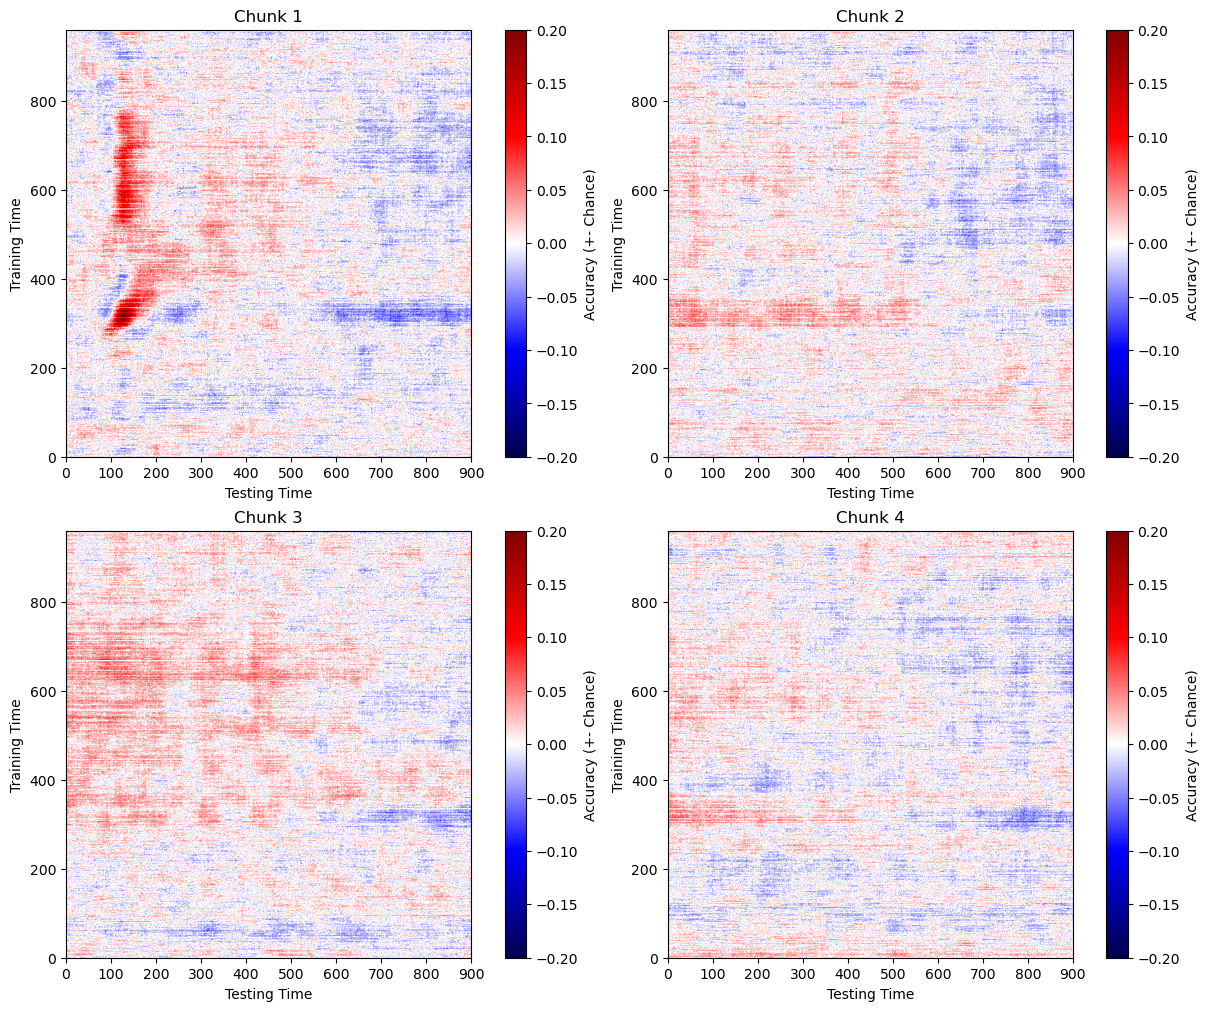

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# shape: 4, 961, 900
data = all_subject_data[0]

# Center the data around chance (accuracy - 0.5)
data_centered = data - 0.5

# Create a grid for plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 10), constrained_layout=True)

# Loop through each chunk
for i, ax in enumerate(axes.flat):
    # Get the data for the current chunk
    chunk_data = data_centered[i]
    
    # Plot the heatmap
    im = ax.imshow(chunk_data, aspect='auto', cmap='seismic', origin='lower',
                   extent=[0, 900, 0, 961], vmin=-0.2, vmax=0.2)
    
    # Customize the plot
    ax.set_title(f'Chunk {i + 1}')
    ax.set_xlabel('Testing Time')
    ax.set_ylabel('Training Time')
    
    
    # Add a colorbar for each heatmap
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Accuracy (+- Chance)')

# Show the grid of heatmaps
plt.show()


In [9]:
print(len(all_subject_data))

14


Min, Max values before averaging: -0.03842474489795916 0.11080994897959173


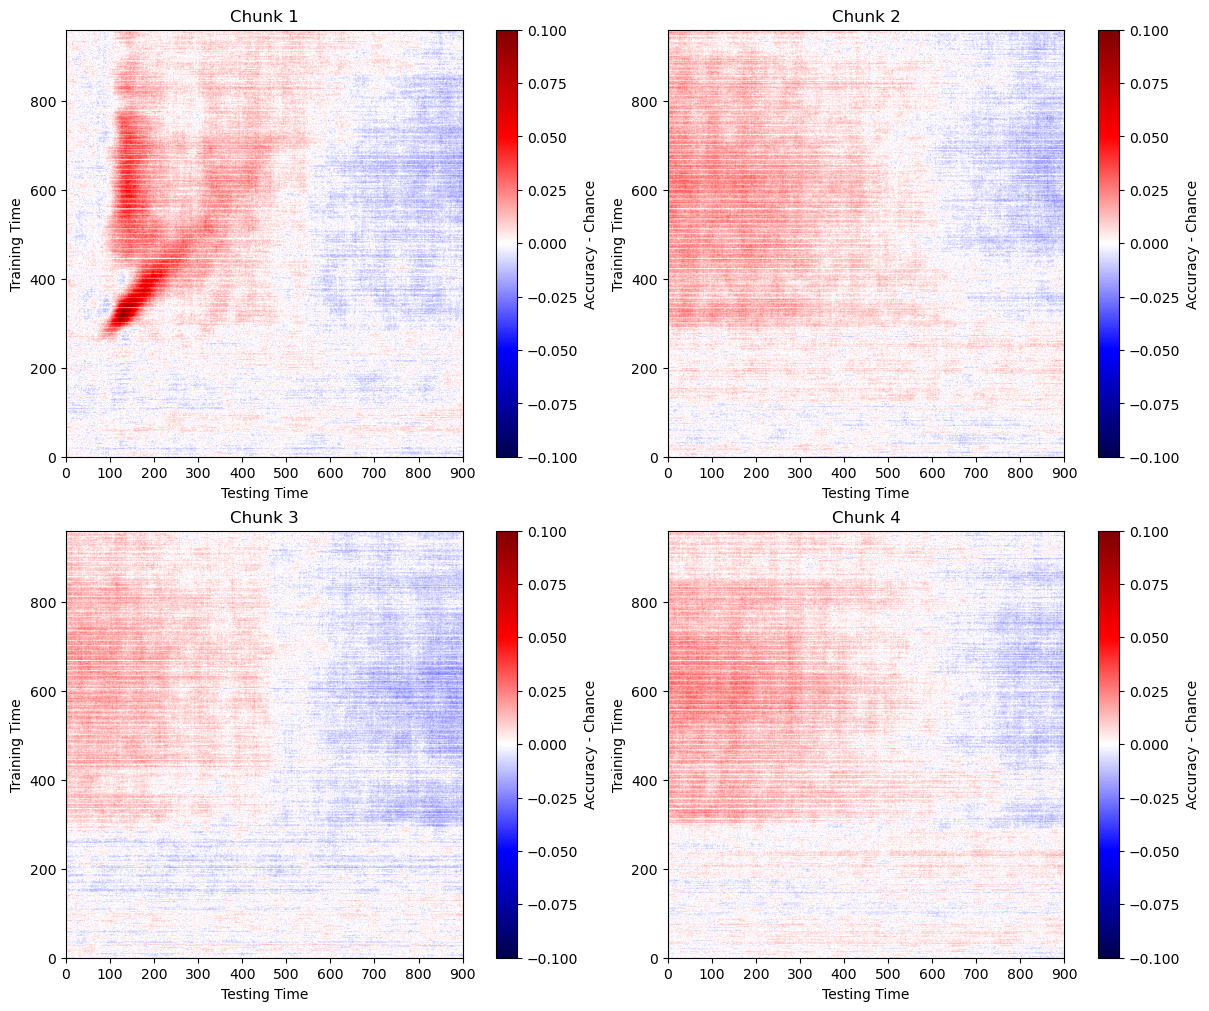

In [8]:
# Stack data for all subjects and average across subjects (axis=0)
all_subject_data = np.stack(all_subject_data, axis=0)  # Shape (subjects, 4, training_times, 900)
averaged_across_subjects = np.mean(all_subject_data, axis=0) - 0.5  # Shape (4, training_times, 900)
print("Min, Max values before averaging:", np.min(averaged_across_subjects), np.max(averaged_across_subjects))
# Plotting the averaged decoding matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10), constrained_layout=True)

for i, ax in enumerate(axes.flat):
    chunk_data = averaged_across_subjects[i]
    im = ax.imshow(chunk_data, aspect='auto', cmap='seismic', origin='lower',
                   extent=[0, 900, 0, chunk_data.shape[0]], vmin=-0.1, vmax=.1)
    ax.set_title(f'Chunk {i + 1}')
    ax.set_xlabel('Testing Time')
    ax.set_ylabel('Training Time')
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Accuracy - Chance')

plt.show()

Min, Max values before averaging: -0.03842474489795916 0.11080994897959173


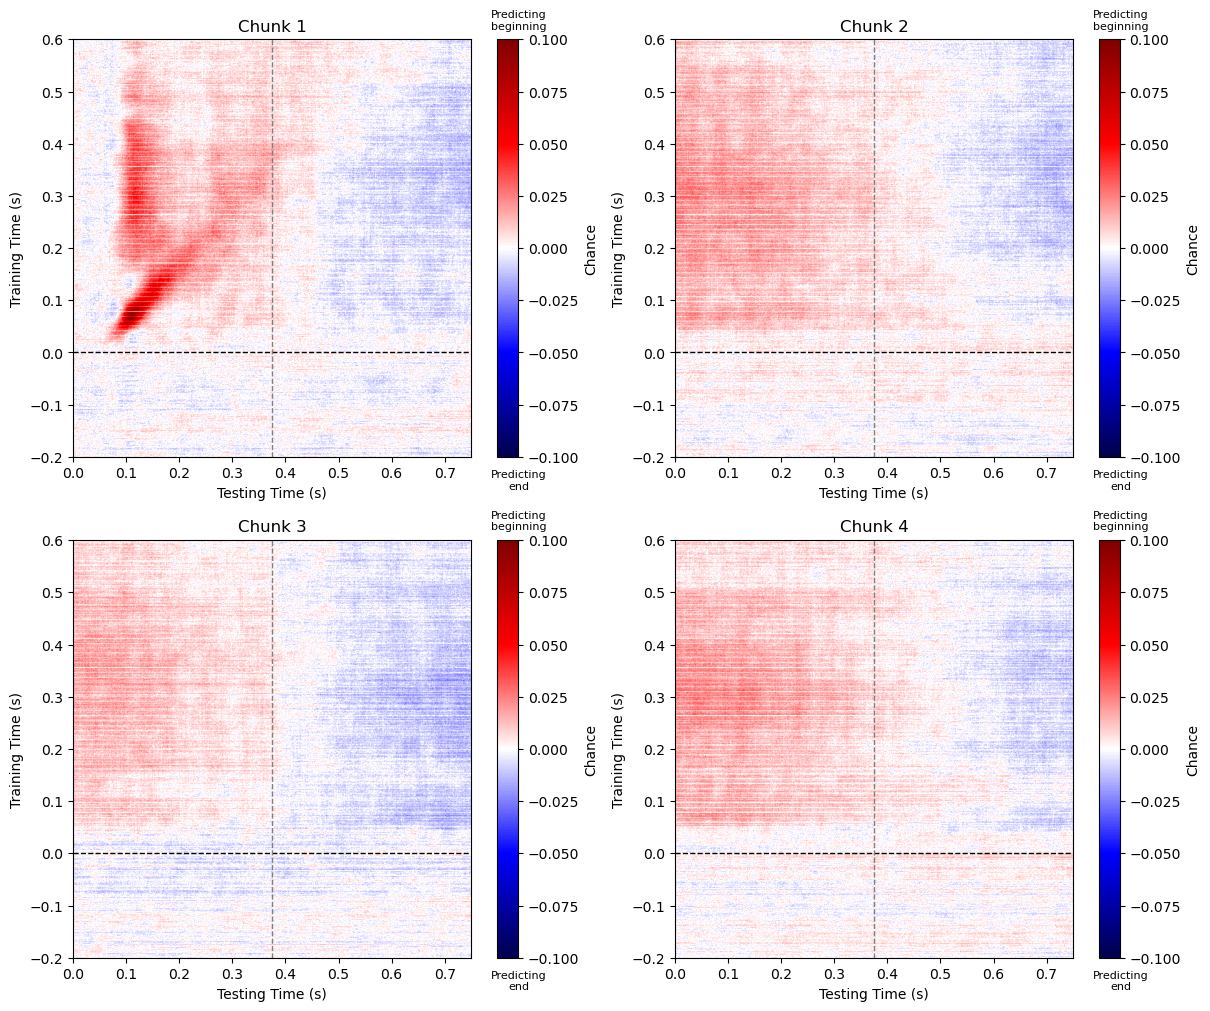

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Assume this already exists
# all_subject_data = np.stack(...)

# Convert shape: (subjects, 4, training_times, 900)
averaged_across_subjects = np.mean(all_subject_data, axis=0) - 0.5  # Now (4, training_times, 900)
print("Min, Max values before averaging:", np.min(averaged_across_subjects), np.max(averaged_across_subjects))

# Define time axes in seconds
n_train = averaged_across_subjects.shape[1]
n_test = averaged_across_subjects.shape[2]
x_extent = [0, 0.75]  # Testing time: 0 to 0.75s
y_extent = [-0.2, 0.6]  # Training time: -0.2 to 0.6s

fig, axes = plt.subplots(2, 2, figsize=(12, 10), constrained_layout=True)

for i, ax in enumerate(axes.flat):
    chunk_data = averaged_across_subjects[i]

    im = ax.imshow(chunk_data, aspect='auto', cmap='seismic', origin='lower',
                   extent=[x_extent[0], x_extent[1], y_extent[0], y_extent[1]],
                   vmin=-0.1, vmax=0.1)

    ax.set_title(f'Chunk {i + 1}')
    ax.set_xlabel('Testing Time (s)')
    ax.set_ylabel('Training Time (s)')

    # Add vertical and horizontal lines
    ax.axhline(y=0, color='k', linestyle='--', linewidth=1)  # Horizontal line at training = 0.1s
    ax.axvline(x=0.375, color='gray', linestyle='--', linewidth=1)  # Vertical line halfway testing time

    # Create colorbar with top and bottom labels
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Chance')
    
    # Custom labels on colorbar
    cbar.ax.text(1.05, 1.02, 'Predicting\nbeginning', transform=cbar.ax.transAxes,
             ha='center', va='bottom', fontsize=8, rotation=0)
    cbar.ax.text(1.05, -0.03, 'Predicting\nend', transform=cbar.ax.transAxes,
             ha='center', va='top', fontsize=8, rotation=0)

plt.show()


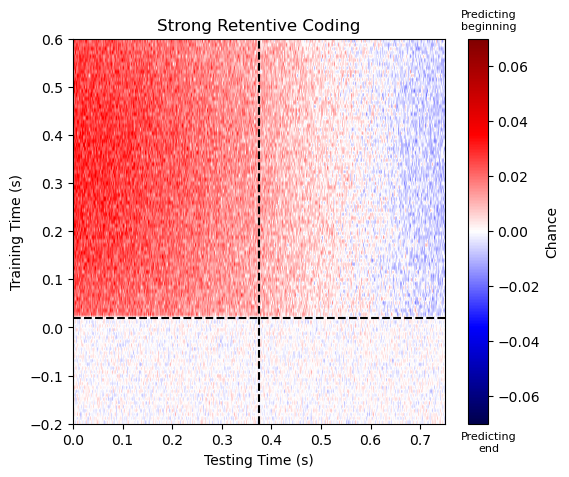

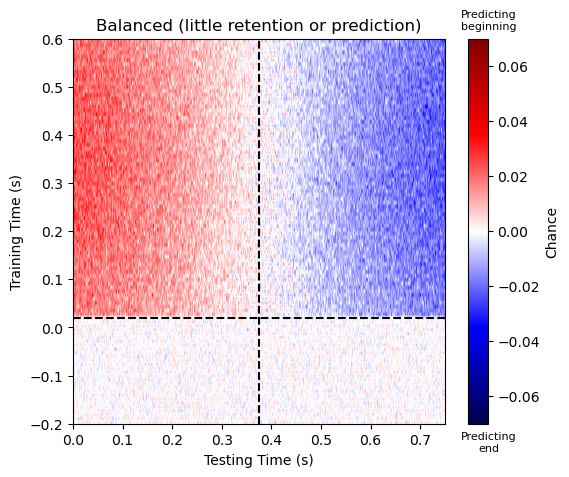

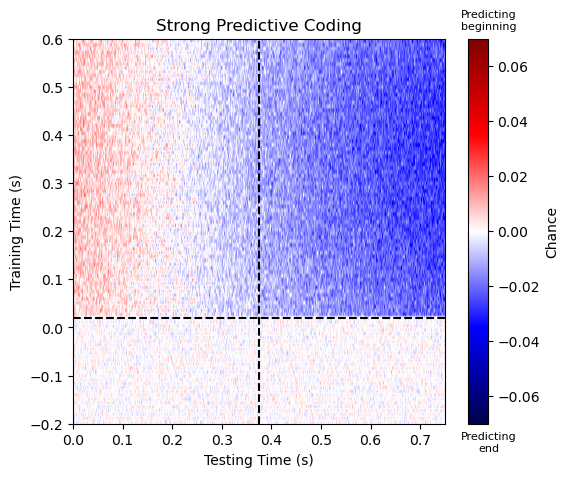

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Grid
n_train = 100
n_test = 900
train_times = np.linspace(-0.2, 0.6, n_train)
test_times = np.linspace(0, 0.75, n_test)
X, Y = np.meshgrid(test_times, train_times)

y_thresh = np.searchsorted(train_times, 0.02)
x_mid = 0.375

# Add pre-0.1 white (chance)
def add_chance_zone(data):
    data[:y_thresh, :] = np.random.normal(0, 0.005, size=(y_thresh, data.shape[1]))
    return data

# Softer fades from edges
def left_fade():
    return np.exp(-(X / 0.75)**2) * np.exp(-((Y - 0.35) / 0.6)**2)

def right_fade():
    return np.exp(-((X - 0.75) / 0.7)**2) * np.exp(-((Y - 0.35) / 0.6)**2)

def noise():
    return np.random.normal(0, 0.008, (n_train, n_test))

# RETENTION
retention = np.zeros((n_train, n_test))
retention[y_thresh:, :] += 0.035 * left_fade()[y_thresh:, :]
retention[y_thresh:, :] -= 0.02 * right_fade()[y_thresh:, :]
retention += noise()
retention = add_chance_zone(retention)

# SWITCH
switch = np.zeros((n_train, n_test))
switch[y_thresh:, :] += 0.035 * left_fade()[y_thresh:, :]
switch[y_thresh:, :] -= 0.035 * right_fade()[y_thresh:, :]
switch += noise()
switch = add_chance_zone(switch)

# PREDICTION
prediction = np.zeros((n_train, n_test))
prediction[y_thresh:, :] -= 0.035 * right_fade()[y_thresh:, :]
prediction[y_thresh:, :] += 0.02 * left_fade()[y_thresh:, :]
prediction += noise()
prediction = add_chance_zone(prediction)

# Function to plot a single map
def plot_single(data, title, filename=None):
    fig, ax = plt.subplots(figsize=(6, 5))
    im = ax.imshow(data, aspect='auto', cmap='seismic', origin='lower',
                   extent=[test_times[0], test_times[-1], train_times[0], train_times[-1]],
                   vmin=-0.07, vmax=0.07)
    ax.set_title(title)
    ax.set_xlabel('Testing Time (s)')
    ax.set_ylabel('Training Time (s)')
    ax.axhline(0.02, color='black', linestyle='--')   # horizontal line
    ax.axvline(x_mid, color='black', linestyle='--')  # vertical line
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Chance')
    cbar.ax.text(1.05, 1.02, 'Predicting\nbeginning', transform=cbar.ax.transAxes,
                 ha='center', va='bottom', fontsize=8)
    cbar.ax.text(1.05, -0.02, 'Predicting\nend', transform=cbar.ax.transAxes,
                 ha='center', va='top', fontsize=8)
    if filename:
        plt.savefig(filename, dpi=300)
    plt.show()

# Plot each separately
plot_single(retention, 'Strong Retentive Coding', filename='retention_plot.png')
plot_single(switch, 'Balanced (little retention or prediction)', filename='switch_plot.png')
plot_single(prediction, 'Strong Predictive Coding', filename='prediction_plot.png')
